<a href="https://colab.research.google.com/github/maa929/4105/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import metrics
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn. decomposition import PCA as RandomizedPCA

In [ ]:
file1 = 'https://raw.githubusercontent.com/maa929/4105/main/cancer.csv'
file2 = 'https://raw.githubusercontent.com/maa929/4105/main/Housing.csv'

In [ ]:
def get_results(Y_test, Y_pred):
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    f1 = metrics.f1_score(Y_test, Y_pred)
    print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
    print("Precision:",metrics.precision_score(Y_test, Y_pred))
    print("Recall:",metrics.recall_score(Y_test, Y_pred))
    print("F1-Score:",metrics.f1_score(Y_test, Y_pred))
    return [accuracy * 100, precision * 100, recall * 100, f1 * 100]

In [ ]:
def logist_model_training_pca(X, Y):
    n = X.shape[1]
    accuracy = []
    recall = []
    precision = []
    f1 = []
    k = []
    for i in range(n):
        print("K = " + str(i + 1))
        pca = PCA(n_components = i + 1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.2, random_state = 9999)
        classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)
        results = get_results(Y_test, Y_pred)
        accuracy.append(results[0])
        precision.append(results[1])
        recall.append(results[2])
        f1.append(results[3])
        k.append(i + 1)
    high_acc = max(accuracy)
    high_acc_k = accuracy.index(max(accuracy)) + 1
    print("----------------")
    print("Highest Classification Accuracy Achieved: " + str(high_acc) + " for K number = " + str(high_acc_k))
    return k, accuracy, precision, recall, f1

In [ ]:
def plot_result_with_k(k, accuracy, precision, recall, f1):
    plt.plot(k, accuracy, label = "Accuracy")
    plt.plot(k, precision, label = "Precision")
    plt.plot(k, recall, label = "Recall")
    plt.plot(k, f1, label = "F1-Score")
    plt.legend()
    plt.title('Kernel Model')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

In [ ]:
def linear_model_training_pca(X, Y):
    n = X.shape[1]
    mse = []
    k = []
    for i in range(n):
        print("Current iteration:", i + 1)
        print("K = " + str(i+1))
        pca = PCA(n_components = i + 1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size = 0.2, random_state = 9999)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        Y_pred_svm = classifier.predict(X_test)
        mse.append(mean_squared_error(y_test, Y_pred))
        k.append(i + 1)

    best_mse = max(mse)
    best_k = mse.index(best_mse) + 1
    print("----------------")
    print("Highest Accuracy Score Achieved: " + str(best_mse) + " for K number = " + str(best_k))

    return k, mse

In [ ]:
def plot_result_with_k2(k, mse):
    plt.plot(k, mse, label = "MSE")
    plt.legend()
    plt.title('Plotting Mean Square Error a different number of Ks')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

Problem 1

In [ ]:
ds1 = pd.DataFrame(pd.read_csv(file1))
varlist =  ['diagnosis']
def binary_map(x):
    return x.map({'M': 1, 'B': 0})
ds1[varlist] = ds1[varlist].apply(binary_map)
X = ds1.iloc[:, 2:32].values
Y = ds1.iloc[:, 1].values
sc = StandardScaler()
ds1a = pd.DataFrame(X)
X = sc.fit_transform(ds1a)
classifier = LogisticRegression(random_state = 100)
K, accuracy, precision, recall, f1 = logist_model_training_pca(X, Y)

K = 1
Accuracy: 0.9298245614035088
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1-Score: 0.8888888888888888
K = 2
Accuracy: 0.9385964912280702
Precision: 0.9393939393939394
Recall: 0.8611111111111112
F1-Score: 0.8985507246376813
K = 3
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score: 0.9444444444444444
K = 4
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9722222222222222
F1-Score: 0.9859154929577464
K = 5
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
K = 6
Accuracy: 0.9912280701754386
Precision: 0.972972972972973
Recall: 1.0
F1-Score: 0.9863013698630138
K = 7
Accuracy: 0.9912280701754386
Precision: 0.972972972972973
Recall: 1.0
F1-Score: 0.9863013698630138
K = 8
Accuracy: 0.9824561403508771
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1-Score: 0.9722222222222222
K = 9
Accuracy: 0.9912280701754386
Precision: 0.972972972972973
Recall: 1.0
F1-Score: 0.9863013698630138
K = 10
Accuracy: 0.982456140350877

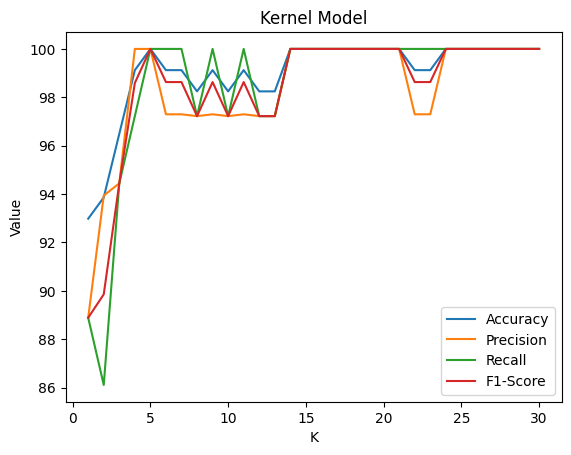

In [ ]:
plot_result_with_k(K, accuracy, precision, recall, f1)

In [ ]:
polyMod = SVC(kernel = 'poly', C = 1E2)
classifier = polyMod
K, accuracy, precision, recall, f1 = logist_model_training_pca(X, Y)

K = 1
Accuracy: 0.9210526315789473
Precision: 0.9655172413793104
Recall: 0.7777777777777778
F1-Score: 0.8615384615384615
K = 2
Accuracy: 0.9298245614035088
Precision: 0.9666666666666667
Recall: 0.8055555555555556
F1-Score: 0.8787878787878789
K = 3
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score: 0.9444444444444444
K = 4
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9444444444444444
F1-Score: 0.9714285714285714
K = 5
Accuracy: 0.9649122807017544
Precision: 0.9705882352941176
Recall: 0.9166666666666666
F1-Score: 0.9428571428571428
K = 6
Accuracy: 0.9649122807017544
Precision: 0.9705882352941176
Recall: 0.9166666666666666
F1-Score: 0.9428571428571428
K = 7
Accuracy: 0.9473684210526315
Precision: 0.9411764705882353
Recall: 0.8888888888888888
F1-Score: 0.9142857142857143
K = 8
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score: 0.9444444444444444
K = 9
Accuracy: 0.9824561403508771
Precision: 0

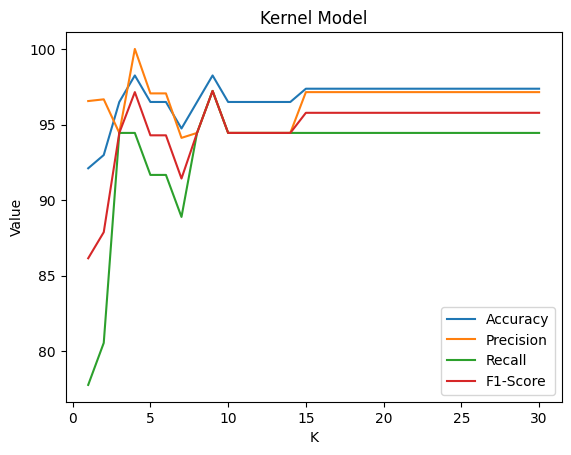

In [ ]:
plot_result_with_k(K, accuracy, precision, recall, f1)

In [ ]:
modelrbf = SVC(kernel = 'rbf', C = 5E3)
classifier = modelrbf
K, accuracy, precision, recall, f1 = logist_model_training_pca(X, Y)

K = 1
Accuracy: 0.9210526315789473
Precision: 0.8648648648648649
Recall: 0.8888888888888888
F1-Score: 0.8767123287671232
K = 2
Accuracy: 0.9298245614035088
Precision: 0.9375
Recall: 0.8333333333333334
F1-Score: 0.8823529411764706
K = 3
Accuracy: 0.9385964912280702
Precision: 0.967741935483871
Recall: 0.8333333333333334
F1-Score: 0.8955223880597015
K = 4
Accuracy: 0.9298245614035088
Precision: 0.868421052631579
Recall: 0.9166666666666666
F1-Score: 0.8918918918918918
K = 5
Accuracy: 0.9473684210526315
Precision: 0.9166666666666666
Recall: 0.9166666666666666
F1-Score: 0.9166666666666666
K = 6
Accuracy: 0.9385964912280702
Precision: 0.8918918918918919
Recall: 0.9166666666666666
F1-Score: 0.9041095890410958
K = 7
Accuracy: 0.9385964912280702
Precision: 0.8918918918918919
Recall: 0.9166666666666666
F1-Score: 0.9041095890410958
K = 8
Accuracy: 0.9473684210526315
Precision: 0.9166666666666666
Recall: 0.9166666666666666
F1-Score: 0.9166666666666666
K = 9
Accuracy: 0.9736842105263158
Precision: 

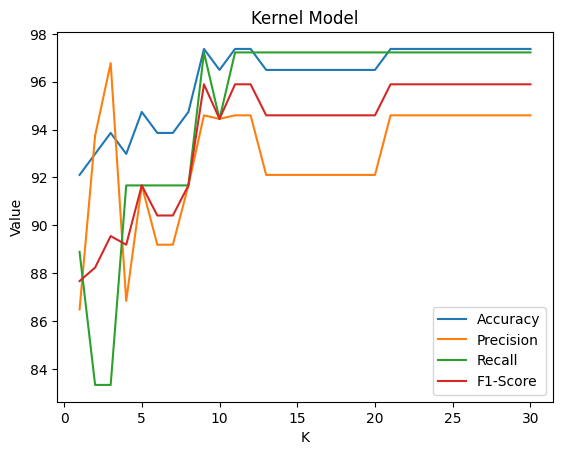

In [ ]:
plot_result_with_k(K, accuracy, precision, recall, f1)

Problem  2

In [ ]:
ds2 = pd.DataFrame(pd.read_csv(file2))
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
ds2[varlist] = ds2[varlist].apply(binary_map)
X = ds2.iloc[:, 1:11].values
Y = ds2.iloc[:, 0].values
ds2a = pd.DataFrame(X)
X = sc.fit_transform(ds2a)
Y = Y.reshape(-1,1)
Ya = sc.fit_transform(Y)
classifier = SVR(kernel = 'rbf', C = 5E2)
k, mse = linear_model_training_pca(X, Ya)

Current iteration: 1
K = 1
Current iteration: 2
K = 2
Current iteration: 3
K = 3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 4
K = 4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 5
K = 5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 6
K = 6
Current iteration: 7
K = 7


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 8
K = 8
Current iteration: 9
K = 9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 10
K = 10
----------------
Highest Accuracy Score Achieved: 1.073488376065472 for K number = 10


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


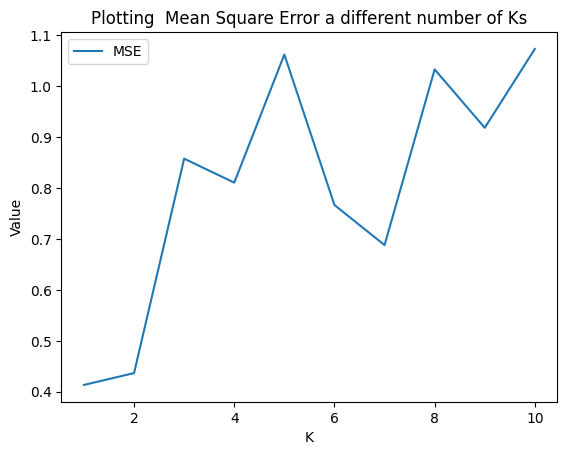

In [ ]:
plot_result_with_k2(k, mse)

In [ ]:
classifier = SVR(kernel = 'linear', C = 5E2)
k, mse = linear_model_training_pca(X, Ya)

Current iteration: 1
K = 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 2
K = 2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 3
K = 3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 4
K = 4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 5
K = 5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 6
K = 6


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 7
K = 7


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 8
K = 8


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 9
K = 9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 10
K = 10


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------
Highest Accuracy Score Achieved: 0.3991757222405496 for K number = 6


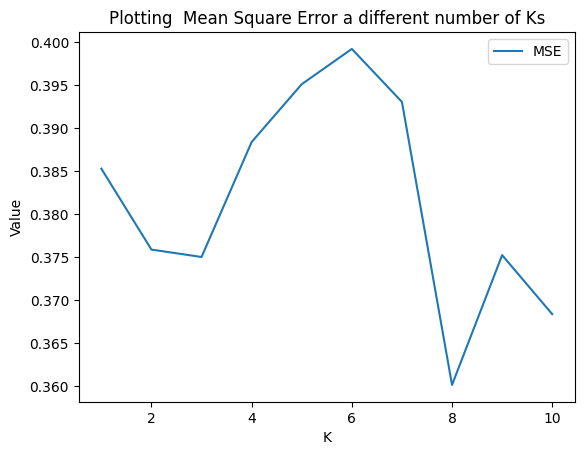

In [ ]:
plot_result_with_k2(k, mse)

In [ ]:
classifier = SVR(kernel = 'poly', C = 5E2)
k, mse = linear_model_training_pca(X, Ya)

Current iteration: 1
K = 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 2
K = 2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 3
K = 3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 4
K = 4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 5
K = 5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 6
K = 6


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 7
K = 7


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 8
K = 8


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 9
K = 9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 10
K = 10


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------
Highest Accuracy Score Achieved: 38.16529097227303 for K number = 10


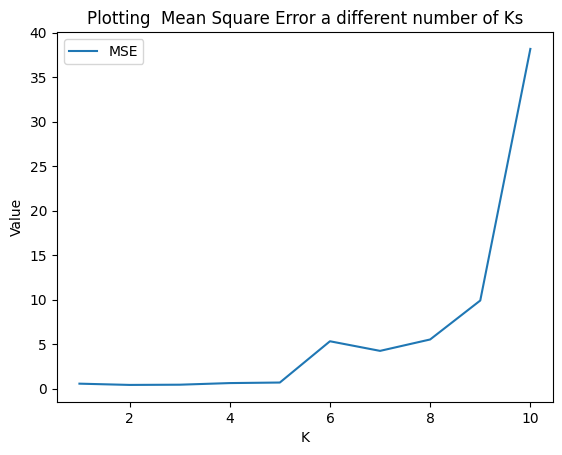

In [ ]:
plot_result_with_k2(k, mse)

In [ ]:
classifier = SVR(kernel = 'sigmoid', C = 5E2)
k, mse = linear_model_training_pca(X, Ya)

Current iteration: 1
K = 1
Current iteration: 2
K = 2
Current iteration: 3
K = 3
Current iteration: 4
K = 4
Current iteration: 5
K = 5
Current iteration: 6
K = 6
Current iteration: 7
K = 7
Current iteration: 8
K = 8
Current iteration: 9
K = 9
Current iteration: 10
K = 10
----------------
Highest Accuracy Score Achieved: 103797613.2311684 for K number = 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

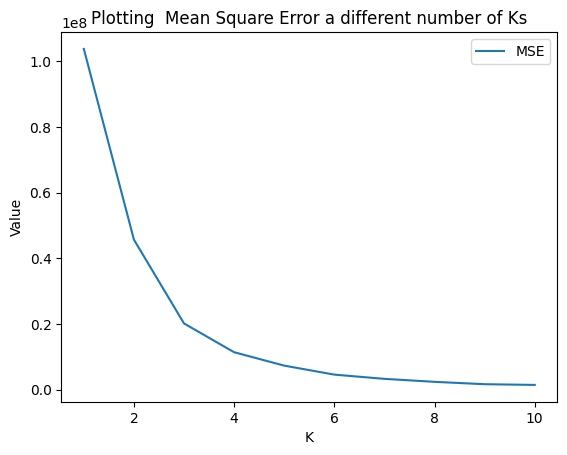

In [ ]:
plot_result_with_k2(k, mse)

In [ ]:
classifier = LinearRegression()
k, mse = linear_model_training_pca(X, Ya)

Current iteration: 1
K = 1
Current iteration: 2
K = 2
Current iteration: 3
K = 3
Current iteration: 4
K = 4
Current iteration: 5
K = 5
Current iteration: 6
K = 6
Current iteration: 7
K = 7
Current iteration: 8
K = 8
Current iteration: 9
K = 9
Current iteration: 10
K = 10
----------------
Highest Accuracy Score Achieved: 0.4214851214760874 for K number = 5


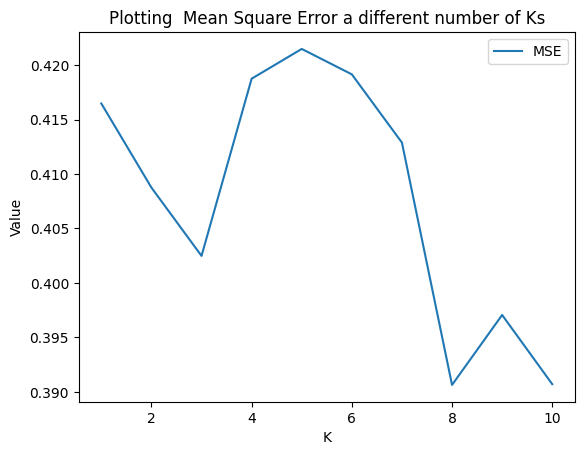

In [ ]:
plot_result_with_k2(k, mse)